In [6]:
import tensorflow as tf
print(tf. __version__) 

2.8.2


1) Dowloading the dataset


In [7]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-08-23 14:13:27--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  22.5MB/s    in 2.9s    

2022-08-23 14:13:31 (22.5 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Extract the Dataset

In [8]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [11]:
import shutil

Splitting the data

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
!mkdir '/tmp/cats_and_dogs_filtered/test'
test_dir = os.path.join(base_dir, 'test')

#Directory with our test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
!mkdir '/tmp/cats_and_dogs_filtered/test/cats'
#Directory with our test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
!mkdir '/tmp/cats_and_dogs_filtered/test/dogs'

In [ ]:
shutil.rmtree('/tmp/horse2zebra/trainB', ignore_errors=False, onerror=None)

In [ ]:
shutil.rmtree('/tmp/cats_and_dogs_filtered/train/sys', ignore_errors=False, onerror=None)

In [11]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(227, 227),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [12]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [26]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.558.jpg', 'cat.350.jpg', 'cat.127.jpg', 'cat.247.jpg', 'cat.30.jpg', 'cat.648.jpg', 'cat.753.jpg', 'cat.819.jpg', 'cat.728.jpg', 'cat.81.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


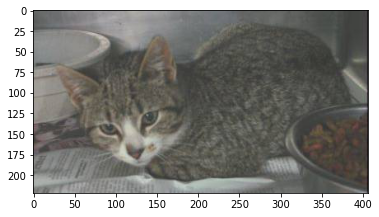

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[0])))

AlexNet Architecture from Scratch

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(227,227,3)))
model.add(tf.keras.layers.Conv2D(96, kernel_size=(11,11), activation="relu", padding="valid"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(tf.keras.layers.Conv2D(256, kernel_size=(5,5), strides=1, activation="relu", padding="same"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=(3,3), padding='valid'))
model.add(tf.keras.layers.Conv2D(384, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu'))
model.add(tf.keras.layers.Conv2D(384, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu'))
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation= 'relu'))
model.add(tf.keras.layers.Dense(4096, activation= 'relu'))
model.add(tf.keras.layers.Dense( 2, activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 217, 217, 96)      34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 108, 108, 96)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 256)     614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 36, 36, 384)       1

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])
 
 

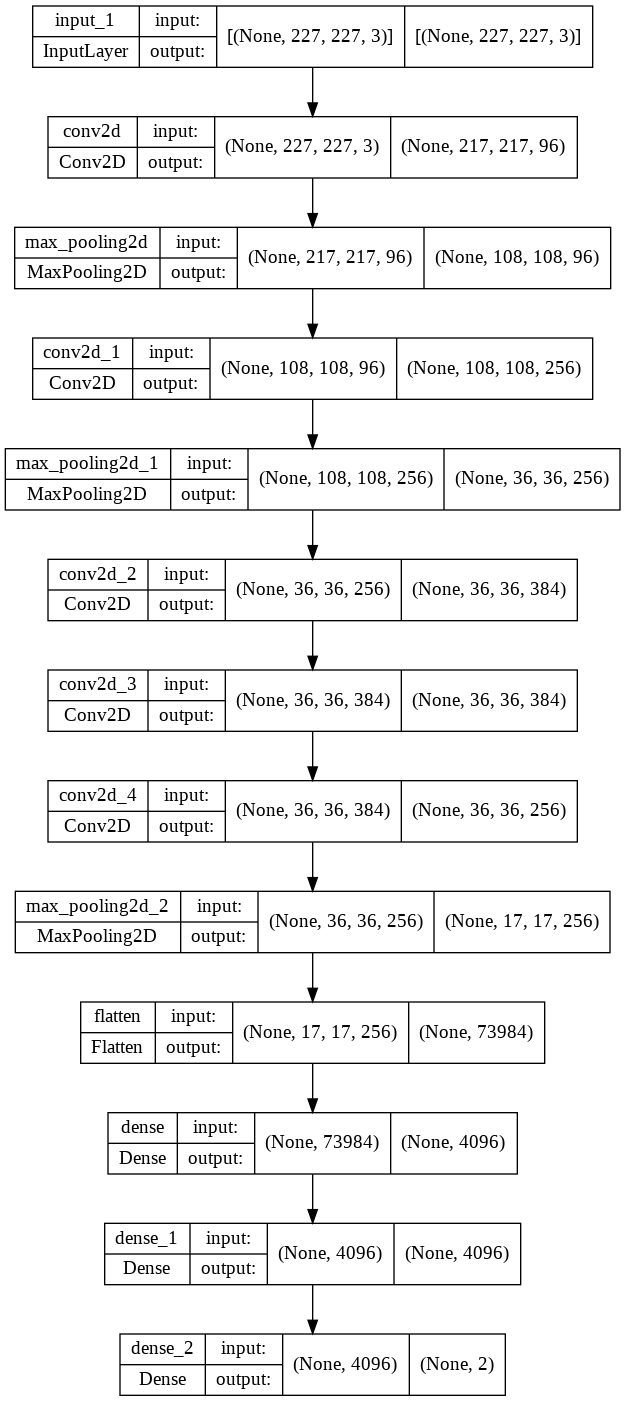

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps 
      verbose=1)

Epoch 1/2
100/100 [==============================] - 46s 311ms/step - loss: 0.6968 - accuracy: 0.5220 - val_loss: 0.6924 - val_accuracy: 0.5310
Epoch 2/2
100/100 [==============================] - 32s 317ms/step - loss: 0.6933 - accuracy: 0.5120 - val_loss: 0.6888 - val_accuracy: 0.6230


VGGNet Architecture

In [ ]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


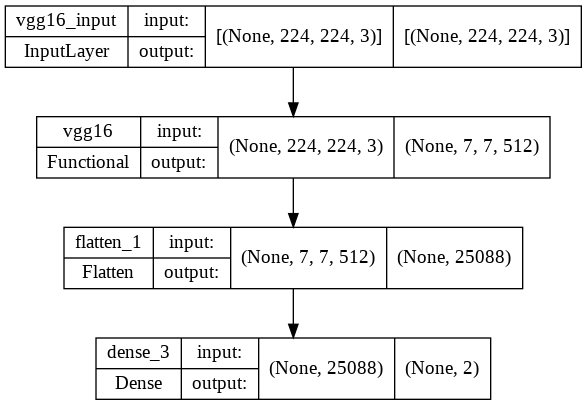

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
100/100 [==============================] - 24s 213ms/step - loss: 0.4586 - acc: 0.7925 - val_loss: 0.3290 - val_acc: 0.8840
Epoch 2/2
100/100 [==============================] - 22s 219ms/step - loss: 0.2815 - acc: 0.8975 - val_loss: 0.3037 - val_acc: 0.8780


GoogleNet Architecture

In [ ]:
from keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

87924736/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_5[0][0]']               
 alization)           

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


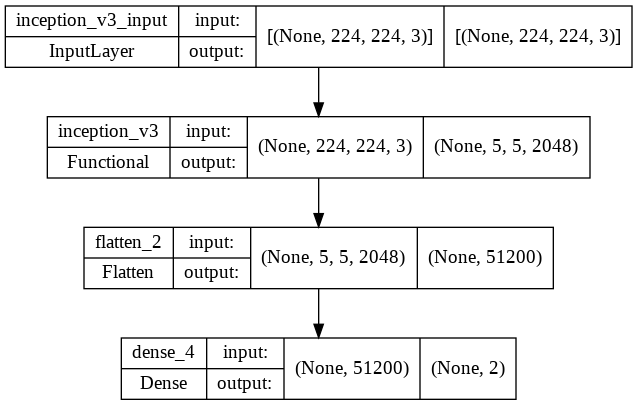

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
100/100 [==============================] - 20s 154ms/step - loss: 0.1202 - acc: 0.9535 - val_loss: 0.0522 - val_acc: 0.9850
Epoch 2/2
100/100 [==============================] - 13s 128ms/step - loss: 0.0124 - acc: 0.9975 - val_loss: 0.0451 - val_acc: 0.9860


ResNet50 Architecture

In [1]:
from keras.applications.resnet import ResNet50
base_model = ResNet50(input_shape=(250,250,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 125, 125, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [2]:
import tensorflow as tf
model1 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model1.summary()

model1.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 2)                 262146    
                                                                 
Total params: 23,849,858
Trainable params: 262,146
Non-trainable params: 23,587,712
_________________________________________________________________


In [14]:
history1 = model1.fit(
train_generator,
      steps_per_epoch=100,  
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50, 
      verbose=1) 
     
      

Epoch 1/2
100/100 [==============================] - 28s 142ms/step - loss: 0.9314 - acc: 0.5320 - val_loss: 0.7130 - val_acc: 0.5070
Epoch 2/2
100/100 [==============================] - 13s 131ms/step - loss: 0.7100 - acc: 0.5730 - val_loss: 0.7367 - val_acc: 0.5150


EfficientNetB0

In [ ]:
from keras.applications.efficientnet import EfficientNetB0
base_model = EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_7[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (Zero

In [ ]:
import tensorflow as tf
model2 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model2.summary()

model2.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_6 (Flatten)         (None, 62720)             0         
                                                                 
 dense_8 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 4,175,013
Trainable params: 125,442
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
history2 = model2.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
100/100 [==============================] - 18s 124ms/step - loss: 0.7708 - acc: 0.5075 - val_loss: 0.9228 - val_acc: 0.5000
Epoch 2/2
100/100 [==============================] - 12s 123ms/step - loss: 0.7235 - acc: 0.5070 - val_loss: 0.6972 - val_acc: 0.5000


 MobileNetV2 Architecture

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2
base_model = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [ ]:
import tensorflow as tf
model3 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model3.summary()

model3.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_7 (Flatten)         (None, 62720)             0         
                                                                 
 dense_9 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
history3 = model3.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
100/100 [==============================] - 14s 116ms/step - loss: 0.1252 - acc: 0.9630 - val_loss: 0.0804 - val_acc: 0.9790
Epoch 2/2
100/100 [==============================] - 11s 107ms/step - loss: 0.0171 - acc: 0.9940 - val_loss: 0.0604 - val_acc: 0.9850


Horse2Zebra Dataset

In [23]:
import os
import zipfile
local_zip = '/tmp/horse2zebra.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
base_dir = '/tmp/horse2zebra'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training horse pictures
train_horse_dir = os.path.join(train_dir, 'trainA')

# Directory with our training zebra pictures
train_zebra_dir = os.path.join(train_dir, 'trainB')

# Directory with our test horse pictures
test_horse_dir = os.path.join(test_dir, 'testA')

# Directory with our test zebra pictures
test_zebra_dir = os.path.join(test_dir, 'testB')

In [27]:
import pandas as pd
import os

In [28]:
sdir=r'/tmp/horse2zebra'
for d in ['testA', 'testB', 'trainA', 'trainB']:
    dpath=os.path.join(sdir,d)
    labels=[]
    filepaths=[]
    flist=os.listdir(dpath)
    for f in flist:
        fpath=os.path.join(dpath,f)
        filepaths.append(fpath)
        if d=='testA' or d == 'trainA':
            labels.append('horse')
        else:
            labels.append('zebra')
    Fseries=pd.Series(filepaths, name='filepaths')
    Lseries=pd.Series(labels, name='labels')
    if d== 'testA':
        test_dfA=pd.concat([Fseries, Lseries], axis=1)
    elif d == 'testB':
        test_dfB=pd.concat([Fseries, Lseries], axis=1)
    elif d == 'trainA':
        dfA=pd.concat([Fseries, Lseries], axis=1)
    else:
        dfB=pd.concat([Fseries, Lseries], axis=1)
test_df=pd.concat([test_dfA, test_dfB], axis=0).reset_index(drop=True)
df=pd.concat([dfA, dfB], axis=0).reset_index(drop=True)
print (df.head())
print (df['labels'].value_counts())
print (len(df))
print (test_df.head() )
print(test_df['labels'].value_counts())

                                    filepaths labels
0  /tmp/horse2zebra/trainA/n02381460_3664.jpg  horse
1  /tmp/horse2zebra/trainA/n02381460_2341.jpg  horse
2  /tmp/horse2zebra/trainA/n02381460_2049.jpg  horse
3  /tmp/horse2zebra/trainA/n02381460_4117.jpg  horse
4  /tmp/horse2zebra/trainA/n02381460_5545.jpg  horse
zebra    1334
horse    1067
Name: labels, dtype: int64
2401
                                   filepaths labels
0  /tmp/horse2zebra/testA/n02381460_2280.jpg  horse
1    /tmp/horse2zebra/testA/n02381460_20.jpg  horse
2   /tmp/horse2zebra/testA/n02381460_600.jpg  horse
3   /tmp/horse2zebra/testA/n02381460_690.jpg  horse
4  /tmp/horse2zebra/testA/n02381460_7190.jpg  horse
zebra    140
horse    120
Name: labels, dtype: int64


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train_split=.9
train_df, valid_df=train_test_split(df, train_size=train_split, shuffle=True, random_state=123)
print ('train samples: ', len(train_df),  ' validation samples', len(valid_df))
print (train_df['labels'].value_counts())

train samples:  2160  validation samples 241
zebra    1194
horse     966
Name: labels, dtype: int64


In [31]:
file_count = 966
samples = []
for category in df['labels'].unique():    
    category_slice = df.query("labels == @category")    
    samples.append(category_slice.sample(file_count, replace=False,random_state=1))
df = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
print (  df['labels'].value_counts()) # check to see each class has 200 samples
print (len(df))

horse    966
zebra    966
Name: labels, dtype: int64
1932


In [32]:
trgen=ImageDataGenerator(rescale=1./255)
tvgen=ImageDataGenerator(rescale=1./255)
train_gen=trgen.flow_from_dataframe( train_df, x_col='filepaths', y_col='labels', target_size=(224,224), class_mode='categorical',
                                   batch_size=80)
test_gen=tvgen.flow_from_dataframe( test_df, x_col='filepaths', y_col='labels', target_size=(224,224), class_mode='categorical',
                                    batch_size=65)
valid_gen=tvgen.flow_from_dataframe( valid_df, x_col='filepaths', y_col='labels', target_size=(224,224), class_mode='categorical',
                                    batch_size=80)

Found 2160 validated image filenames belonging to 2 classes.
Found 260 validated image filenames belonging to 2 classes.
Found 241 validated image filenames belonging to 2 classes.


AlexNet:

In [33]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(227,227,3)))
model.add(tf.keras.layers.Conv2D(96, kernel_size=(11,11), activation="relu", padding="valid"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(tf.keras.layers.Conv2D(256, kernel_size=(5,5), strides=1, activation="relu", padding="same"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=(3,3), padding='valid'))
model.add(tf.keras.layers.Conv2D(384, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu'))
model.add(tf.keras.layers.Conv2D(384, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu'))
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), strides= 1, padding= 'same', activation= 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides= (2,2), padding= 'valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation= 'relu'))
model.add(tf.keras.layers.Dense(4096, activation= 'relu'))
model.add(tf.keras.layers.Dense( 2, activation= 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 217, 217, 96)      34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 108, 108, 96)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 256)     614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 36, 36, 384)      

In [34]:
model.compile(loss="categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])

In [35]:
history = model.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps 
      verbose=1)

Epoch 1/2
100/100 [==============================] - 37s 312ms/step - loss: 0.6994 - accuracy: 0.5190 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/2
100/100 [==============================] - 31s 307ms/step - loss: 0.6936 - accuracy: 0.5215 - val_loss: 0.6927 - val_accuracy: 0.5000


In [36]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [37]:
import tensorflow as tf
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [38]:
history = model.fit(
train_gen,  
      epochs=2,
      validation_data=valid_gen,
      verbose=1)


Epoch 1/2
27/27 [==============================] - 19s 483ms/step - loss: 0.4479 - acc: 0.7991 - val_loss: 0.3182 - val_acc: 0.8838
Epoch 2/2
27/27 [==============================] - 11s 420ms/step - loss: 0.2372 - acc: 0.9236 - val_loss: 0.2365 - val_acc: 0.9212


GoogleNet

In [39]:
from keras.applications.inception_v3 import InceptionV3
base_model1 =  InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model1.trainable = False #freeze the layers
base_model1.summary()


87924736/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_5[0][0]']               
 alization)           

In [40]:
import tensorflow as tf
model1 = tf.keras.Sequential([
    base_model1,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model1.summary()

model1.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 51200)             0         
                                                                 
 dense_5 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [41]:
history = model1.fit(
train_gen, epochs=2,validation_data=valid_gen,verbose=1)

Epoch 1/2
27/27 [==============================] - 15s 335ms/step - loss: 0.1128 - acc: 0.9546 - val_loss: 0.0577 - val_acc: 0.9793
Epoch 2/2
27/27 [==============================] - 7s 267ms/step - loss: 0.0183 - acc: 0.9931 - val_loss: 0.0615 - val_acc: 0.9793


In [42]:
model1.evaluate(valid_gen)

4/4 [==============================] - 1s 164ms/step - loss: 0.0615 - acc: 0.9793


[0.061487529426813126, 0.9792531132698059]

ResNet50

In [46]:
base_model3 = tf.keras.applications.resnet50.ResNet50(input_shape=(224,224,3),include_top=False, weights='imagenet')
base_model3.trainable = False #freeze the layers
base_model3.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [47]:
import tensorflow as tf
model2 = tf.keras.Sequential([
    base_model3,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model2.summary()

model2.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_5 (Flatten)         (None, 100352)            0         
                                                                 
 dense_7 (Dense)             (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


In [48]:
history = model2.fit(train_gen, epochs=2, validation_data=valid_gen )

Epoch 1/2
27/27 [==============================] - 12s 339ms/step - loss: 0.6117 - acc: 0.6481 - val_loss: 0.5267 - val_acc: 0.7427
Epoch 2/2
27/27 [==============================] - 8s 294ms/step - loss: 0.4750 - acc: 0.7782 - val_loss: 0.4556 - val_acc: 0.7801


In [49]:
model2.evaluate(train_gen)

27/27 [==============================] - 7s 262ms/step - loss: 0.4426 - acc: 0.8157


[0.44260600209236145, 0.8157407641410828]

EfficientB0:

In [50]:
base_model4 = tf.keras.applications.EfficientNetB0(include_top=False, input_shape=(224,224,3),weights='imagenet')
base_model4.trainable = False #freeze the layers
base_model4.summary()


16719872/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_7[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (Zero

In [51]:
import tensorflow as tf
model3 = tf.keras.Sequential([
    base_model4,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model3.summary()

model3.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_6 (Flatten)         (None, 62720)             0         
                                                                 
 dense_8 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 4,175,013
Trainable params: 125,442
Non-trainable params: 4,049,571
_________________________________________________________________


In [54]:
history = model3.fit(
train_gen,
    
      epochs=2,
      validation_data=valid_gen,
       )

Epoch 1/2
27/27 [==============================] - 7s 266ms/step - loss: 0.7043 - acc: 0.5259 - val_loss: 0.7013 - val_acc: 0.4315
Epoch 2/2
27/27 [==============================] - 7s 259ms/step - loss: 0.6866 - acc: 0.5514 - val_loss: 0.6702 - val_acc: 0.5809


In [53]:
model3.evaluate(train_gen)

27/27 [==============================] - 6s 229ms/step - loss: 0.6921 - acc: 0.4662


[0.6920725703239441, 0.4662036895751953]

MobileNet:

In [55]:
base_model5=tf.keras.applications.MobileNetV2(include_top=False, input_shape=(224,224,3),weights='imagenet')
base_model5.trainable = False #freeze the layers
base_model5.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [57]:
import tensorflow as tf
model4 = tf.keras.Sequential([
    base_model5,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model4.summary()

model4.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_8 (Flatten)         (None, 62720)             0         
                                                                 
 dense_10 (Dense)            (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


In [58]:
history = model4.fit(
train_gen,
        
      epochs=2,
      validation_data=valid_gen,
         
      )

Epoch 1/2
27/27 [==============================] - 11s 281ms/step - loss: 0.1715 - acc: 0.9273 - val_loss: 0.0729 - val_acc: 0.9793
Epoch 2/2
27/27 [==============================] - 7s 242ms/step - loss: 0.0134 - acc: 0.9954 - val_loss: 0.0558 - val_acc: 0.9793


In [59]:
model4.evaluate(train_gen)


27/27 [==============================] - 6s 214ms/step - loss: 0.0041 - acc: 1.0000


[0.004081211052834988, 1.0]